# Programs
The programs below shows the iterations of our code trying to implement the PDF in the form of Python Code.

### Linear Probability Density Function
This is the Linear Implementation in Python of the **Probability Density Function** in a Python Function.

In [884]:
import time

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def linearPDF(mean: float, std_dev: float, plotGraph: bool = True):
    # Generate a range of x values
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

    # Calculate the corresponding PDF values
    y = norm.pdf(x, mean, std_dev)

    # Plot the PDF
    if plotGraph:
        plt.plot(x, y)
        plt.title('Probability Density Function')
        plt.xlabel('x')
        plt.ylabel('Probability Density')
        plt.show()

# Example usage: plot_pdf(float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")))

### Two-Dimensional Probability Density Function
This function presents the PDF in a two-dimensional form with available parameters: `mu_x, mu_y, sigma_x, sigma_y, rho, a, b, c, d`
> Parameters `a`, `b`, `c`, and `d` cannot be 0 as it would be invalid to calculate

In [885]:
import numpy as np
from scipy.stats import multivariate_normal

def twodimPDF(mu_x: float, mu_y: float, sigma_x: float, sigma_y: float, rho: float, a: float, b: float, c: float, d: float, plotGraph: bool = True):
    # Define the mean vector and covariance matrix
    mean = [mu_x, mu_y]
    covariance = [[sigma_x**2, rho*sigma_x*sigma_y], [rho*sigma_x*sigma_y, sigma_y**2]]

    # Get Scale Absolute value
    graphLength: float = max([abs(mu_x + b),abs(mu_x - a),abs(mu_x + a),abs(mu_x - b),abs(mu_y + c),abs(mu_y + d),abs(mu_y - c),abs(mu_y - d)])

    # Create a grid of points
    x = y = np.linspace(0, graphLength, 100) # For Unifying the plot graph X and Y axis scales (0 to calculated scale)
    norm_x, norm_y = np.linspace(mu_x - a, mu_x + b, 100), np.linspace(mu_y - c, mu_y + d, 100) # Calculates actual linear spaces

    X, Y = np.meshgrid(norm_x, norm_y) # Plots mesh grid slots according to actual linear

    # Stack the points into a 2D array
    pos = np.dstack((X, Y))

    # Create a multivariate normal distribution
    rv = multivariate_normal(mean, covariance, allow_singular=True)

    # Calculate the PDF
    pdf = rv.pdf(pos)

    # Plot the PDF
    if plotGraph:
        plt.figure(figsize=(8, 6))
        plt.contourf(x, y, pdf, cmap='viridis') # Draws plot graph according to the calculated scale on both axis
        plt.colorbar()
        plt.title('2D Gaussian Probability Density Function')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return pdf

# Example Usage: twodimPDF(float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")), float(input("Enter Sigma_X: ")), float(input("Enter Sigma_Y: ")), float(input("Enter Rho: ")), float(input("Enter A: ")), float(input("Enter B: ")), float(input("Enter C: ")), float(input("Enter D: ")))

We can use both functions and execute the following: (Example Cases: __0, 50, 1, 1, 0, 10, 10, 10, 10__)

In [886]:
# mu_x, mu_y = float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: "))
# 
# linearPDF(mu_x, mu_y)
# twodimPDF(mu_x, mu_y, float(input("Enter Sigma_X: ")), float(input("Enter Sigma_Y: ")), float(input("Enter Rho: ")), float(input("Enter A: ")), float(input("Enter B: ")), float(input("Enter C: ")), float(input("Enter D: ")))

### The Quadratic Drag Coefficient Equation
The equation here presents this equation: $C_{\mathrm{D}}$ = $C \left({\pi \rho E d_{c}^{2} \over 32 \mu^{2}}\right)^{1/3} \mathrm{Re}^{-2/3}$

- $C_{\mathrm{D}}$ is the drag coefficient
- $C$ is a constant
- $\rho$ is the fluid density
- $E$ is the Young's modulus
- $d_c$ is the filament diameter
- $\mu$ is the dynamic viscosity
- $\mathrm{Re}$ is the Reynolds number

**Example Figures 1 (Non-Fact-Validated)**
- C = 12 (dimensionless constant)
- rho = 1.2 kg/m^3 (fluid density of air)
- E = 70 GPa (Young's modulus for a polymer filament)
- dc = 100 μm (filament diameter)
- mu = 1.8×10^-5 Pa·s (dynamic viscosity of air)
- Re = 1000 (example Reynolds number)

**Example Figures 2 (Fact-Validated)**
- C = 12 (dimensionless constant)
- rho = 1.204 kg/m^3 (fluid density of air)
- E = 70 GPa (Young's modulus for a polymer filament)
> The Young's Modulus here used could differ from the actual Young's Modulus values for a Dandelion Pappus Filament, as there were no actual figures recorded.
> The similar replacements were Fiberglass Filaments (Standard 10~70 GPa, [Ref. 1](https://omnexus.specialchem.com/polymer-properties/properties/young-modulus)), as they were recorded to be made with similar structure to dandelion pappus filaments ([Ref. 2](https://www.nature.com/articles/s41467-023-38792-z)).
- dc = 1~10 μm (filament diameter of Fiberglass filament, [Ref. 2](https://www.nature.com/articles/s41467-023-38792-z))
- mu = 18.1 MicroPa·s (dynamic viscosity of air, Standard 18.1 MicroPa·s at 15 Degree Celcius and 18.6 MicroPa·s at 25 Degree Celcius, [Ref. 3](https://www.engineersedge.com/physics/viscosity_of_air_dynamic_and_kinematic_14483.htm))
- Re = 1~1000 (example Reynolds number)

The Code below presents a python function that substitutes the values of the equation as the parameters for the function.

In [887]:
import matplotlib.pyplot as plt
import numpy as np

def drag_coefficient_plot(C: float, rho: float, E: float, dc: float, mu: float):
    # Range of Re
    Re_range = np.linspace(1, 1000, 100)
    
    # The equation
    CD = (C * ((np.pi * rho * E * dc**2) / (32 * mu**2))**(1/3)) * Re_range**(-2/3)
    
    # Limits the displaying Y scope of the graph
    plt.ylim(0, 20)
    
    # Plots the graph
    plt.plot(Re_range, CD)
    plt.xlabel('Re')
    plt.ylabel('CD')
    plt.title('Drag Coefficient vs Reynolds Number')
    plt.show()

# C, rho, E, dc, mu = float(input("C: ")), float(input("rho (density): ")), float(input("E (Young's modulus): ")), float(input("dc (filament diameter): ")), float(input("mu (dynamic viscosity): "))
# drag_coefficient_plot(C, rho, E, dc, mu)

An example input here:

In [888]:
# C, rho, E, dc, mu = float(input("C: ")), float(input("rho (density): ")), float(input("E (Young's modulus): ")), float(input("dc (filament diameter): ")), float(input("mu (dynamic viscosity): "))
# drag_coefficient_plot(C, rho, E, dc, mu)

### Model Visualizing
This is the real stuff. I want to die
I will show here step by step of my mind thinking process.

#### Grids
So, basically, what we have to do right now is to plot out a mesh grid. So, here's a sample code:

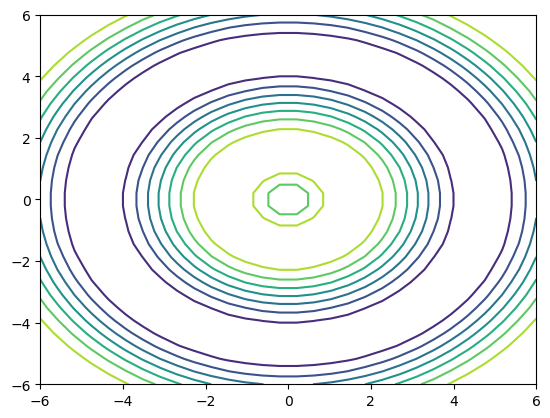

In [889]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x = y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z)

plt.show()

#### Compatibility of PDF in Final Plot
Time for the hard part.
We can't use the PDFunction from previously written code, because that code returns a type that we don't want. So we have to revise the entire function to return as a function that calculates the PDF at a give `(x,y)` point.

In [890]:
def statistical_dimPDF(mu_x: float, mu_y: float, sigma_x: float, sigma_y: float, rho: float, a: float, b: float, c: float, d: float, plotGraph: bool = False):
    # Define the mean vector and covariance matrix
    mean = [mu_x, mu_y]
    covariance = [[sigma_x**2, rho*sigma_x*sigma_y], [rho*sigma_x*sigma_y, sigma_y**2]]

    # Get Scale Absolute value
    graphLength: float = max([abs(mu_x + b),abs(mu_x - a),abs(mu_x + a),abs(mu_x - b),abs(mu_y + c),abs(mu_y + d),abs(mu_y - c),abs(mu_y - d)])

    # Create a grid of points
    x = y = np.linspace(0, graphLength, 100) # For Unifying the plot graph X and Y axis scales (0 to calculated scale)
    norm_x, norm_y = np.linspace(mu_x - a, mu_x + b, 100), np.linspace(mu_y - c, mu_y + d, 100) # Calculates actual linear spaces

    X, Y = np.meshgrid(norm_x, norm_y) # Plots mesh grid slots according to actual linear

    # Stack the points into a 2D array
    pos = np.dstack((X, Y))

    # Create a multivariate normal distribution
    rv = multivariate_normal(mean, covariance, allow_singular=True)

    # Calculate the PDF
    pdf = rv.pdf(pos)

    # Plot the PDF
    if plotGraph:
        plt.figure(figsize=(8, 6))
        plt.contourf(x, y, pdf, cmap='viridis') # Draws plot graph according to the calculated scale on both axis
        plt.colorbar()
        plt.title('2D Gaussian Probability Density Function')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    # Return a function that calculates the PDF at a given point
    return lambda point: rv.pdf(point)

#### Proper-Chanced Distribution Plotting
In the final results, we have to plot out the distributions for each batch of seed and then the spread pos of each seed in batch. Here's the code.

batch_calc() finished calculation within 0.00011014938354492188 seconds
batch_calc() finished calculation within 0.0009758472442626953 seconds
batch_calc() finished calculation within 6.508827209472656e-05 seconds
batch_calc() finished calculation within 0.0007238388061523438 seconds
batch_calc() finished calculation within 0.00030994415283203125 seconds
batch_calc() finished calculation within 0.0003428459167480469 seconds
batch_calc() finished calculation within 2.47955322265625e-05 seconds
batch_calc() finished calculation within 0.00012063980102539062 seconds
batch_calc() finished calculation within 0.0003287792205810547 seconds
batch_calc() finished calculation within 0.0010769367218017578 seconds
batch_calc() finished calculation within 0.0008480548858642578 seconds
batch_calc() finished calculation within 0.0006589889526367188 seconds
batch_calc() finished calculation within 0.0005939006805419922 seconds
batch_calc() finished calculation within 0.0005171298980712891 seconds
batc

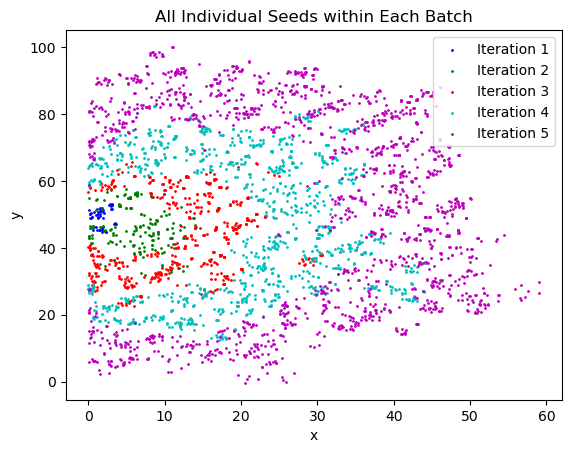

Time Taken: 139 seconds


In [891]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random
from scipy.spatial import cKDTree
from mpl_toolkits.mplot3d import Axes3D

# Constants
n_0 = int(input("Enter the number of seeds: "))
V_range = (5, 20)
a_range = (0, 360)
theta_range = (0, 360)
n_range = (1, 20)
k = 1  # Assuming k=1, you can change it to the value you want

# Function to calculate V_x and V_y
def calculate_velocity(V: float, a: float, theta: float):
    V_x = V * np.sin(np.radians(a)) * np.cos(np.radians(theta))
    V_y = V * np.sin(np.radians(a)) * np.sin(np.radians(theta))
    return V_x, V_y

# Function to calculate landing position
def landing_position(V_x, V_y, t, x_prev, y_prev):
    x_t = V_x * t + x_prev
    y_t = V_y * t + y_prev
    return x_t, y_t

# Function to calculate sigma
def calculate_sigma(V_local):
    sigma_1 = k * np.log(abs(V_local[0]))
    sigma_2 = k * np.log(abs(V_local[1]))
    return sigma_1, sigma_2

def calculate_weighted_pos(intervals: list[int]):
    n_min = intervals[0]
    n_max = intervals[len(intervals) - 1]
    n_rand = random.randint(n_min, n_max)
    if intervals[1] >= n_rand >= intervals[0]:
        return 0
    else:
        return 1

# Function to generate seeds within the PDF
def generate_seeds(weight: list[int], n, x_range, y_range, pdf = None, survival_threshold = 0.5):
    seeds = []
    low_perc, high_perc, one_hot = [], [], []
    flags: list[bool] = []
    x_interval = x_range[1] - x_range[0]
    y_interval = y_range[1] - y_range[0]
    x_first = x_interval * 0.75
    y_first = y_interval * 0.75
    
    for i in range(n):
        low_perc.append((random.uniform(x_range[0] + x_first + 1, x_range[1]), random.uniform(y_range[0] + y_first + 1, y_range[1])))
        high_perc.append((random.uniform(x_range[0], x_range[0] + x_first), random.uniform(y_range[0], y_range[0] + y_first)))
        one_hot.append(calculate_weighted_pos(weight))
    
    for i in range(n):
        flags.append(
            high_perc[i][0] > 0 and
            low_perc[i][0] > 0
            # count_nearby_points(high_perc[i] if one_hot[i] == 0 else low_perc[i], all_seeds, 2) <= 43
        )
    
    for i in range(n):
        if one_hot[i] == 0:
            if flags[i] and count_nearby_points(high_perc[i], all_seeds, 5) <= 43:
                seeds.append(high_perc[i])
                all_seeds.append(high_perc[i])
        else:
            if flags[i] and count_nearby_points(low_perc[i], all_seeds, 5) <= 43:
                seeds.append(low_perc[i])
                all_seeds.append(low_perc[i])
    return seeds

# Main simulation
seeds = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']  # Color for each iteration

def batch_calc(n_seeds: int, x_init: int, y_init: int, rho_sim: float, a_range, theta_range):
    """
    Simulates the spread of individual seeds for each batch that has a number of ``n_seeds`` seeds
    :param n_seeds: Number of seeds in this Batch
    :param x_init: Initial X Position before wind spread of this batch
    :param y_init: Initial Y Position before wind spread of this batch
    :param rho_sim: Calculated Rho probability, from Rho_1 * Rho_2
    :param a_range: Calculated Alpha Angle from each iteration
    :param theta_range: Calculated Theta Angle from each iteration
    :return: The seed positions simulated in this batch.
    """
    start_time = time.time()
    batch_seeds = []
    # Step 1: Generate random values
    # OPTIMIZE: add Random number range generation preprocessing
    a = random.uniform(*a_range)
    theta = random.uniform(*theta_range)
    V = random.uniform(*V_range)
    t = random.random()  # Assuming t is a random value between 0 and 1

    # Step 2: Calculate V_x and V_y
    V_x, V_y = calculate_velocity(V, a, theta)

    # Step 3: Calculate the Batch's landing position
    x_landing, y_landing = landing_position(V_x, V_y, t, x_init, y_init)

    # Step 4: Calculate sigma
    sigma_1, sigma_2 = calculate_sigma((V_x, V_y))

    # Step 5: Generate a PDF at the landing position for dispersion generation
    # pdf = statistical_dimPDF(x_init, y_init, sigma_1, sigma_2, rho_sim, 1, 1, 1, 1)

    # Step 6: Generate seeds within the PDF
    new_seeds = generate_seeds([0, 75, 100], n_seeds, (x_landing, x_landing + 3), (y_landing, y_landing + 3), None, rho_sim)
    batch_seeds.extend(new_seeds)
    
    print(f"batch_calc() finished calculation within {time.time()-start_time} seconds")
    return batch_seeds, theta, a

all_seeds: list[tuple[float, float]] = []
# qtree = cKDTree(all_seeds)

from scipy.spatial import cKDTree

def count_nearby_points(pos: tuple[float, float], point_list: list[tuple[float, float]], radius: float) -> int:
    try:
        # Convert point list to numpy array
        points = np.array(point_list)
    
        # Build KDTree
        tree = cKDTree(points)
    
        # Query for points within radius
        indices = tree.query_ball_point(pos, r=radius)
    
        # Return count of nearby points
        return len(indices)
    except Exception:
        return 0

def simulate(r1: float, r2: float, iterations: int):
    """
    Simulates the Entire Taraxacum Model using Charlie's Probability Model
    :param r1: Rho1 Value in decimal percentage
    :param r2: Rho2 Value in decimal percentage
    :param iterations: Number of iterations to simulate
    :return: Time taken to do this simulation
    """
    time_start = time.time()
    all_seeds.clear()
    rho_sim = r1 * r2
    iteration_batch: list[list[tuple[float, float]]] = []
    for i in range(iterations):
        # OPTIMIZE: Put Preprocessing Optimization Here
        n_size: int = int(n_0 * rho_sim)
        a_trend = 0
        theta_trend = 0
        local_batch = []
        flag: bool = False
        # a_vals, theta_vals, V_vals, t_vals = [], [], [], []
        # a_vals.append(random.uniform(*a_range))
        # theta_vals.append(random.uniform(*theta_range))
        # V_vals.append(random.uniform(*V_range))
        # t_vals.append(random.uniform(0.2, 5))
        # for it in range(n_size-1):
        #     a_vals.append(random.uniform(a_vals[it] - 10, a_vals[it] + 10))
        #     theta_vals.append(random.uniform(theta_vals[it] - 10, theta_vals[it] + 10))
        #     V_vals.append(random.uniform(V_vals[it] - 1, V_vals[it] + 1))
        #     t_vals.append(random.uniform(t_vals[it] - 1, t_vals[it] + 1))
        
        while n_size > 0:
            n_batch_size = int(round(random.uniform(*n_range)))
            if n_size - n_batch_size < 0:
                n_batch_size = n_size
            n_size -= n_batch_size
            if i == 0:
                seeds_local, a_trend, theta_trend = batch_calc(n_batch_size, 0, 50, rho_sim, a_range if not flag else (a_trend - 10, a_trend + 10), theta_range if not flag else (theta_trend - 10, theta_trend + 10))
                local_batch.extend(seeds_local)
                flag = True
            else:
                for batch in iteration_batch[i-1]:
                    seeds_local, a_trend, theta_trend = batch_calc(n_batch_size, batch[0], batch[1], rho_sim, (a_trend - 10, a_trend + 10), (theta_trend - 10, theta_trend + 10))
                    local_batch.extend(seeds_local)
        iteration_batch.append(local_batch)
        plt.scatter(*zip(*iteration_batch[i]), s=1, color=colors[i % len(colors)], label=f'Iteration {i+1}')

    # Step 9: Plot all the seeds
    plt.legend()
    plt.title('All Individual Seeds within Each Batch')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return time.time() - time_start

rho_1 = float(input("Enter Rho_1: "))
rho_2 = float(input("Enter Rho_2: "))
iteration_tot = int(input("Enter the amount of iterations: "))
time_taken = simulate(rho_1, rho_2, iteration_tot)
print(f"Time Taken: {round(time_taken)} seconds")

The Graphs below are another visualized equation.